### Assuming we have installed all presequite packages, import them

In [1]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from facebook_scraper import get_posts, get_profile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from ast import literal_eval 
import numpy as np
import csv
import os
import re

Declaring email, password of crawling account and ID of the page is going to be crawled

In [3]:
EMAIL = "your-email"
PASSWORD = "your-password"
PAGE_ID = "Cristiano"

### Let's define some function we gonna use in the crawling process

In [4]:
def initDriver():
    '''
    Initiallize the chrome driver with the options to disable the notification
    Basically create a browser window
    '''
    options = webdriver.ChromeOptions()
    options.add_argument("--disable-notifications")
    return webdriver.Chrome(options=options)

In [5]:
def fbLogin(driver, email, password):
    '''
    Login to facebook after the browser is opened
    using the given email and password
    '''
    driver.get("https://facebook.com")

    # Login
    userEmail = driver.find_element(by="id", value="email")
    userEmail.send_keys(email)
    userPass = driver.find_element(by="id", value="pass")
    userPass.send_keys(password)

    userPass.send_keys(Keys.ENTER)

In [6]:
def readData(fileName):
    ''' 
    Read data from the given file
    Mainly used to read post IDs list
    '''
    f = open(fileName, 'r', encoding='utf-8')
    data = []
    for i, line in enumerate(f):
        try:
            line = repr(line)
            line = line[1:len(line) - 3]
            data.append(line)
        except:
            print("Error writing line")
    return data

In [7]:
def writeFileTxt(fileName, content):
    ''' 
    Write given content to file
    Mainly used to save post IDs list
    '''
    with open(fileName, 'a') as f1:
        f1.write(content + '\n')

In [8]:
def getPostID(driver, filePath= 'posts.csv'):
    ''' 
    Get all post IDs on the browser page at the moment
    also scroll down to load for more posts
    '''
    allPost = readData(filePath) # Store list of posts ID
    sleep(5)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    elements = driver.find_elements(By.XPATH, '//a[contains(@href, "https://www.facebook.com/Cristiano/posts/") and contains(@class, "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz xt0b8zv xi81zsa xo1l8bm")]')
    if len(elements):
        for element in elements:
            postId = element.get_attribute("href").split('posts/')[1].split('?')[0]
            if postId not in allPost:
                print(postId)
                writeFileTxt(filePath, postId)

In [9]:
def getnumPost(driver, page_id, amount, filePath= 'posts.csv'):
    ''' 
    Using getPostID function to get post IDs
    until reach the amount of post needed
    '''
    driver.get("https://facebook.com/" + page_id)
    while len(readData(filePath)) < amount:
        getPostID(driver, filePath)

### Step 1. Get 100 post IDs of the Page

In [10]:
driver = initDriver() # Browser 
fbLogin(driver, EMAIL, PASSWORD) # Login to facebook
sleep(5) # Wait for the page to load
getnumPost(driver, PAGE_ID, 100) # Get 100 post IDs and save to posts.csv
driver.quit()

In [11]:
post_IDs = readData('posts.csv') # List of post IDs
print(len(post_IDs)) # Got >= 100 IDs due to over-scrolling

102


In [ ]:
post_urls = [f"https://facebook.com/{id}" for id in post_IDs]
options = {
    "comments": 10,
    "reactions" : True,
    "allow_extra_requests": True,
}
posts = []

# Try to get as many post as possible for one account
for post in get_posts(
    post_urls=post_urls, 
    credentials=(EMAIL, PASSWORD),
    options=options,
):
    posts.append(post)
    sleep(20)

In [ ]:
# Each post's data fields
print(posts[0].keys())

dict_keys(['original_request_url', 'post_url', 'post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'video_ids', 'videos', 'was_live', 'fetched_time'])


!!! Let's have a look at some data that we need

In [ ]:
# Post's content
print(posts[0]['text'])

Solid win!💪🏼
We keep the pressure on!
@alnassr 💛💙


In [ ]:
# Time posted
print(posts[0]['time'])

2023-11-05 04:34:41


In [ ]:
# Number of post's comments
print(posts[0]['comments'])

36605


In [ ]:
# Post's reactions count
print(posts[0]['reaction_count'])

771284


In [ ]:
# Post's type of reactions
pprint(posts[0]['reactions'])

{'angry': 38,
 'care': 33544,
 'haha': 1398,
 'like': 506046,
 'love': 229710,
 'sad': 43,
 'wow': 505}


In [ ]:
# Post's shares count
print(posts[0]['shares'])

7264


In [ ]:
# Post's comments
for comment in posts[0]['comments_full']:
    print(comment['commenter_name'] + ': ' + comment['comment_text'])
    print(f"Got {comment['comment_reaction_count']} reactions and {len(comment['replies'])} replies")
    print()

Le Roi: hi
Got None reactions and 0 replies

عصام غنيم: اللُهم لأجل أطفال آبرياء ، ونساء ضُعفاء ، ورجال لا حيلة لهُم ، كُن لهم نصيراً🇵🇸♥️
Got 167 reactions and 13 replies

Noor Shahenshaha: Very impressive🐐🫶❤️
Got 55 reactions and 7 replies

Nahida & Nadiya vlog: Very impressive!🐐🫶❤️
Got 10 reactions and 3 replies

Mujammel Hosen: Very impressive!🐐🫶❤️
Got 133 reactions and 13 replies

Tala loves you: Very impressive!🐐🫶❤️
Got 8 reactions and 1 replies

Tala loves you: Very impressive!🐐🫶❤️
Got 7 reactions and 1 replies

Md MiZan RaHman: Very impressive!🐐🫶❤️
Got 39 reactions and 5 replies

EVI CEE MW: Very impressive!🐐🫶❤️
Got 29 reactions and 4 replies

Sàjîd Khåñ Srkk Kīñg: Good luck ❤️🇵🇰
Got 118 reactions and 22 replies

Aneel Rathor: Very impressive🐐🫶❤️
Got 34 reactions and 7 replies

S　A　D　D　A　 M　ツ: Very impressive!🐐❤️
Got 41 reactions and 9 replies

Tala loves you: Very impressive!🐐🫶❤️
Got 80 reactions and 12 replies

Azad Jashni: Very impressive!🐐🫶❤️
Got 31 reactions and 4 replies



**NOTE: Since FB restriction we can only get a few 'comments' and 'reaction_count' from a few post**

Let's convert posts to a DF now

In [ ]:
df = pd.DataFrame(posts)
df.head()

,original_request_url,post_url,post_id,text,post_text,shared_text,original_text,time,timestamp,image,...,with,page_id,sharers,image_id,image_ids,video_ids,videos,was_live,fetched_time,header
0,https://facebook.com/pfbid0VNW13c1vSx8MXLY5Y37...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid0VNW13c1vSx8MXLY5Y378v5boCdX868LDjCdQ7NWy...,Solid win!💪🏼\nWe keep the pressure on!\n@alnas...,Solid win!💪🏼\nWe keep the pressure on!\n@alnas...,,None,2023-11-05 04:34:41,1.699134e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,...,None,81221197163,None,None,[],[],[],False,2023-11-07 14:45:20.333732,NaN
1,https://facebook.com/pfbid0a5k8pgN3EDSN4RpWQSm...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid0a5k8pgN3EDSN4RpWQSmnJExZt3gWv8cswKaHRUsj...,🎯,🎯,,None,2023-11-04 04:37:00,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,...,None,81221197163,None,None,[],[],[],False,2023-11-07 14:47:43.479309,NaN
2,https://facebook.com/pfbid03nE5M9QxyWBrHea8RAo...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid03nE5M9QxyWBrHea8RAoJUnWDnk2gsfRCDgTkPEK8...,Como embaixador da Liga Portuguesa Contra o Ca...,Como embaixador da Liga Portuguesa Contra o Ca...,Liga Portuguesa Contra o Cancro\n25 October at...,Como embaixador da Liga Portuguesa Contra o Ca...,2023-11-03 01:50:54,1.698951e+09,None,...,"[{'name': 'Liga Portuguesa Contra o Cancro', '...",81221197163,None,None,[],NaN,NaN,False,2023-11-07 14:50:32.337924,Cristiano Ronaldo
3,https://facebook.com/pfbid09zqZNMYnT7M4gAVt91y...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid09zqZNMYnT7M4gAVt91yLBNQgejmVt7LdpDr4B5Nh...,Amazing spirit from the Team!💪🏽\nIncredible su...,Amazing spirit from the Team!💪🏽\nIncredible su...,,None,2023-11-01 02:53:54,1.698782e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,...,None,81221197163,None,None,[],[],[],False,2023-11-07 14:51:55.099315,NaN
4,https://facebook.com/pfbid02AJXduxv7R9S8sjRm9d...,https://facebook.com/story.php?story_fbid=pfbi...,pfbid02AJXduxv7R9S8sjRm9d38V2BVW7SX568RkCxWLS5...,"Another win, important we keep the momentum!\n...","Another win, important we keep the momentum!\n...",,None,2023-10-29 01:02:35,1.698516e+09,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,...,None,81221197163,None,None,[],[],[],False,2023-11-07 14:54:30.552303,NaN


Save data to a file for later use

In [ ]:
df.to_csv('Data/raw_Cristiano.csv', index=False)
df.to_excel('Data/raw_Cristiano.xlsx', index=False)

### Step 2. Fill in missing data

In [ ]:
# This was written few days later
# I found out that the facebook_scraper library is not stable
# So let's load up our data and strip data we won't need, fill in the missing data with different method
df = pd.read_csv('Data/Cristiano.csv')
df.head(5)

In [ ]:
# Drop unnecessary columns
df = df[['post_id','text', 'time', 'comments', 'shares']]
# TODO:
# Add reactions count for each post
# Add comments text for each post
df.head(5)

**Define some functions**

In [ ]:
def get_count_react(href):
        ''' 
        Get reaction type and count from the given href
        '''
        reaction_type = re.search(r'reaction_type=(\d+)', href).group(1)
        total_count = re.search(r'total_count=(\d+)', href).group(1)
        if reaction_type == '1':
            reaction_type = 'like'
        elif reaction_type == '2':
                reaction_type = 'love'
        elif reaction_type == '16':
               reaction_type = 'care'
        elif reaction_type == '4':
               reaction_type = 'haha'
        elif reaction_type == '3':
                reaction_type = 'wow'
        elif reaction_type == '7':
                reaction_type = 'sad'
        else:
                reaction_type = 'angry'
        return reaction_type, int(total_count)

In [ ]:
def get_reactions(driver, post_id):
    '''
    Get all reactions of a post
    '''
    driver.get(f"https://mbasic.facebook.com/ufi/reaction/profile/browser/?ft_ent_identifier={post_id}")
    sleep(5)
    links = driver.find_elements(By.XPATH, value="//a[@role='button' and @aria-pressed='false']")
    
    hrefs = [link.get_attribute('href') for link in links]
    reactions = {}
    for href in hrefs:
        reaction_type, count = get_count_react(href)
        reactions[reaction_type] = count
    return reactions

In [ ]:
def get_comments_per_site(driver):
    '''
    Get all comments appearing on site max 10
    {
        'commenter_name': name,
        'commenter_id': commenter_id,
        'text': text,
        'comment_id': comment_id,
    }
    '''
    comments = []
    
    boxes = driver.find_elements(By.XPATH, value="//html/body/div/div/div[2]/div/div/div[2]/div/div[5]/*")
    
    for box in boxes:
        try:
            commenter_name = box.find_element(By.XPATH, value=".//h3/a").text
            def get_id_from_href(href):
                id_match = re.search(r'\?id=(\d+)', href)
                if id_match:
                    return id_match.group(1)
                else:
                    return re.search(r'/([^?]+)', href).group(1)
            commenter_id =  get_id_from_href(box.find_element(By.XPATH, value=".//h3/a").get_attribute('href'))
            comment_text = box.find_element(By.XPATH, value=".//div/div").text
            comment_id = box.get_attribute('id')
            comments.append({
                'commenter_name': commenter_name,
                'commenter_id': commenter_id,
                'text': comment_text,
                'comment_id': comment_id,
            })
        except: # Have see previous
            continue

    return comments

In [ ]:
def get_comment_full(driver, amount, post_id):
    ''' 
    Get <amount> comments of a post
    '''
    driver.get(f"https://mbasic.facebook.com/{post_id}")
    sleep(5)

    comments = []
    while True:
        comments += get_comments_per_site(driver)
        if len(comments) >= amount:
            break
        sleep(10)
    
        # Find see_next else break
        try:
            button = driver.find_element(By.XPATH, value="//div[contains(@id, 'see_next')]")
            button.find_element(By.XPATH, value=".//a").click()
            sleep(10)
        except:
            break
    return comments[:amount]

In [ ]:
driver = initDriver()
fbLogin(driver, EMAIL, PASSWORD)
sleep(5)

In [ ]:
df['reactions'] = df['post_id'].apply(lambda x: get_reactions(driver, x))
df['reaction_count'] = df['reactions'].apply(lambda x: sum(x.values()))
df['comments_full'] = df['post_id'].apply(lambda x: get_comment_full(driver, 20, x)) # Get 20 comments for each post

## Data Analysis

In [105]:
# Change type to time
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

Most interactive post

In [ ]:
most_reacted_post = df.loc[df['reaction_count'].idxmax()]
print(most_reacted_post.post_id)
most_commented_post = df.loc[df['comments'].idxmax()]
# print(most_commented_post)
most_shared_post = df.loc[df['shares'].idxmax()]
# print(most_shared_post)

pfbid02ficGeokEZiH9CjQdrES5E37dmXCduXCMg712qgN86X8joYPzHu3r1sbaP2Xud88ml


Most common hours for posting

Text(0.5, 0, 'Hour')

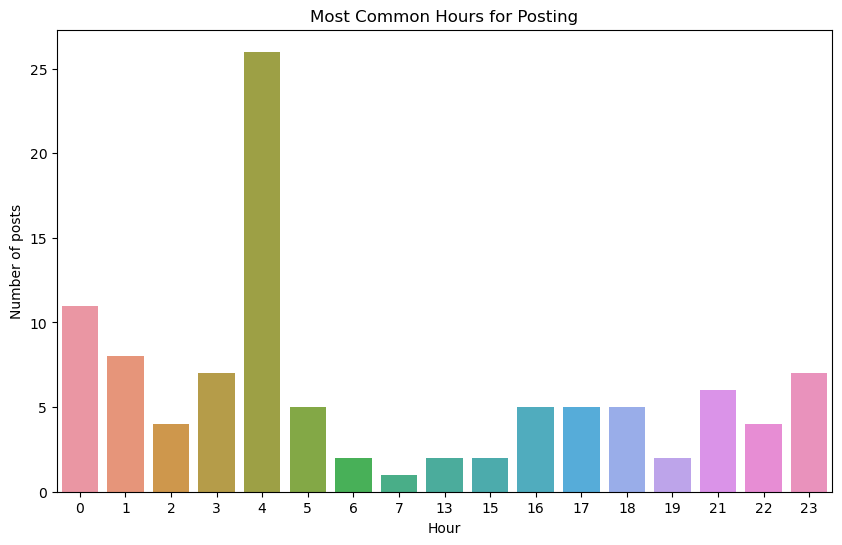

In [109]:
# Extract the hour from the time column
df['hour'] = df['time'].dt.hour

# Count the frequency of each hour
hour_counts = df['hour'].value_counts()

# Plot the most common hours for posting
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Most Common Hours for Posting')
plt.ylabel('Number of posts')
plt.xlabel('Hour')

In [123]:
df.loc[df['hour'] == 4, 'text'].head(7)

0     Solid win!💪🏼\nWe keep the pressure on!\n@alnas...
1                                                     🎯
5     Special night in Riyadh - 3 wins out of 3 - an...
9     Mais uma vitória e um bom jogo de toda a equip...
11    Vamos Portugal!🇵🇹👍🏽\n#vesteabandeira\n\nLet's ...
14    🇵🇹👏🏼\n\nSeleções de Portugal\n4 October at 22:...
16    Good game from everyone on the team!\nHappy to...
Name: text, dtype: object

Correlation with interaction and posted time

<Axes: >

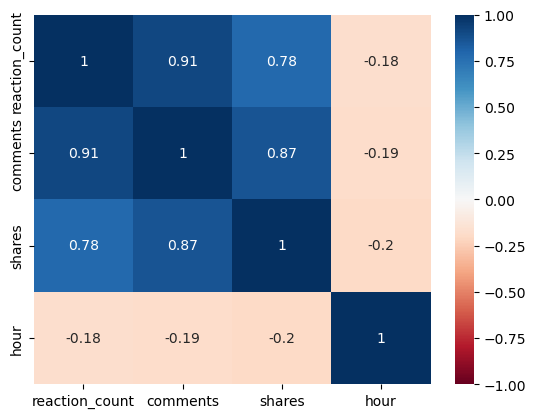

In [112]:
corr = df[['reaction_count', 'comments', 'shares', 'hour']].corr()
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1)

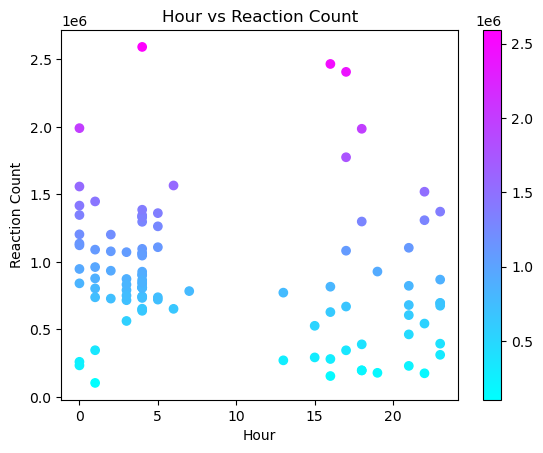

In [125]:
plt.scatter(df['hour'], df['reaction_count'], c=df['reaction_count'], cmap='cool')
plt.title('Hour vs Reaction Count')
plt.xlabel('Hour')
plt.ylabel('Reaction Count')
plt.colorbar()

Reaction change

In [134]:
df

,post_id,time,comments,shares,reactions,reaction_count,comments_full,hour,text
0,pfbid0VNW13c1vSx8MXLY5Y378v5boCdX868LDjCdQ7NWy...,2023-11-05 04:34:41,36605,7264,"{'like': 549715, 'love': 249711, 'care': 36586...",838221,"[{'commenter_name': 'Sajib Biwas', 'commenter_...",4,Solid win!💪🏼\nWe keep the pressure on!\n@alnas...
1,pfbid0a5k8pgN3EDSN4RpWQSmnJExZt3gWv8cswKaHRUsj...,2023-11-04 04:37:00,42850,9519,"{'like': 597164, 'love': 277586, 'care': 48952...",927674,"[{'commenter_name': 'MargetteIsabella', 'comme...",4,🎯
2,pfbid03nE5M9QxyWBrHea8RAoJUnWDnk2gsfRCDgTkPEK8...,2023-11-03 01:50:54,4720,514,"{'like': 60695, 'love': 35697, 'care': 7376, '...",104043,"[{'commenter_name': 'Emely Vera', 'commenter_i...",1,Como embaixador da Liga Portuguesa Contra o Ca...
3,pfbid09zqZNMYnT7M4gAVt91yLBNQgejmVt7LdpDr4B5Nh...,2023-11-01 02:53:54,44357,4005,"{'like': 479097, 'love': 216380, 'care': 28047...",728337,"[{'commenter_name': 'ashish Kushwaha', 'commen...",2,Amazing spirit from the Team!💪🏽\nIncredible su...
4,pfbid02AJXduxv7R9S8sjRm9d38V2BVW7SX568RkCxWLS5...,2023-10-29 01:02:35,28008,4564,"{'like': 483662, 'love': 221916, 'care': 30792...",738020,"[{'commenter_name': 'Dr Ruhi Rayeen', 'comment...",1,"Another win, important we keep the momentum!\n..."
...,...,...,...,...,...,...,...,...,...
97,pfbid0313sMubcL8pdhvYUt2t2qEFFVZwY4ENWHcU3nTsJ...,2023-03-27 04:43:06,87606,23976,"{'like': 846633, 'love': 487816, 'care': 47564...",1386272,"[{'commenter_name': 'Facebook', 'commenter_id'...",4,"2 jogos, 2 vitórias! Objetivo cumprido. Feliz ..."
98,pfbid02J6SUXNNRArVbdTg8sscnaqxkNk8LyBb3A2kydRQ...,2023-03-25 23:04:51,25363,4059,"{'like': 425707, 'love': 228117, 'care': 20138...",675493,"[{'commenter_name': 'يوسف الحسين', 'commenter_...",23,Winning team!🇵🇹💪🏽😅
99,pfbid02JU4fkjStpqYFVRtn3KPLePKJ7jcZCs6AmobWn4n...,2023-03-25 16:03:20,31133,2099,"{'like': 404130, 'love': 204665, 'care': 17825...",628536,"[{'commenter_name': 'Koné Zakaria Koné', 'comm...",16,A fragrance that surprises you with just one s...
100,pfbid0qPd52NMksaAY3JuPHgBptGzGis3zSKVQWJgxPMp7...,2023-03-25 00:15:58,67688,7239,"{'like': 690923, 'love': 386101, 'care': 34208...",1122952,"[{'commenter_name': 'أحمد جمال', 'commenter_id...",0,Feeling my best with #CR7UNDERWEAR


<Figure size 1600x800 with 0 Axes>

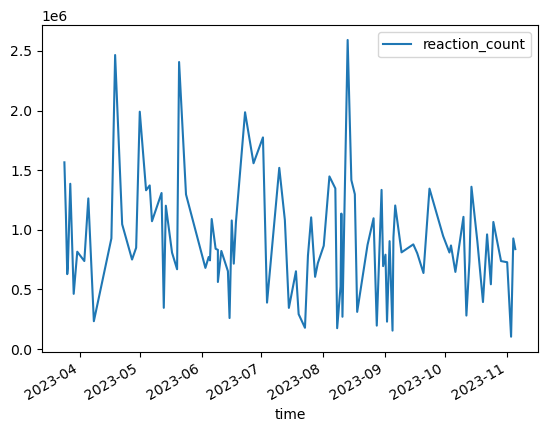

In [ ]:
plt.figure(figsize=(16, 8))
df.plot(x='time', y='reaction_count')
plt.show()

<Figure size 1600x800 with 0 Axes>

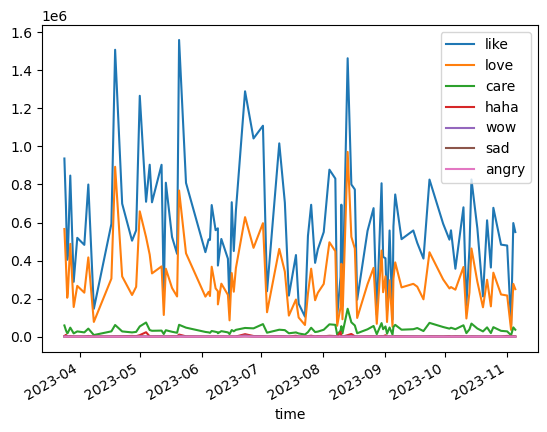

In [ ]:
# Extract reactions
df['like'] = df['reactions'].apply(lambda x: literal_eval(x)['like'])
df['love'] = df['reactions'].apply(lambda x: literal_eval(x)['love'])
df['care'] = df['reactions'].apply(lambda x: literal_eval(x)['care'])
df['haha'] = df['reactions'].apply(lambda x: literal_eval(x)['haha'])
df['wow'] = df['reactions'].apply(lambda x: literal_eval(x)['wow'])
df['sad'] = df['reactions'].apply(lambda x: literal_eval(x)['sad'])
df['angry'] = df['reactions'].apply(lambda x: literal_eval(x)['angry'])

# Plot the reactions
plt.figure(figsize=(16, 8))
df.plot(x='time', y=['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry'])
plt.show()

Common words in post

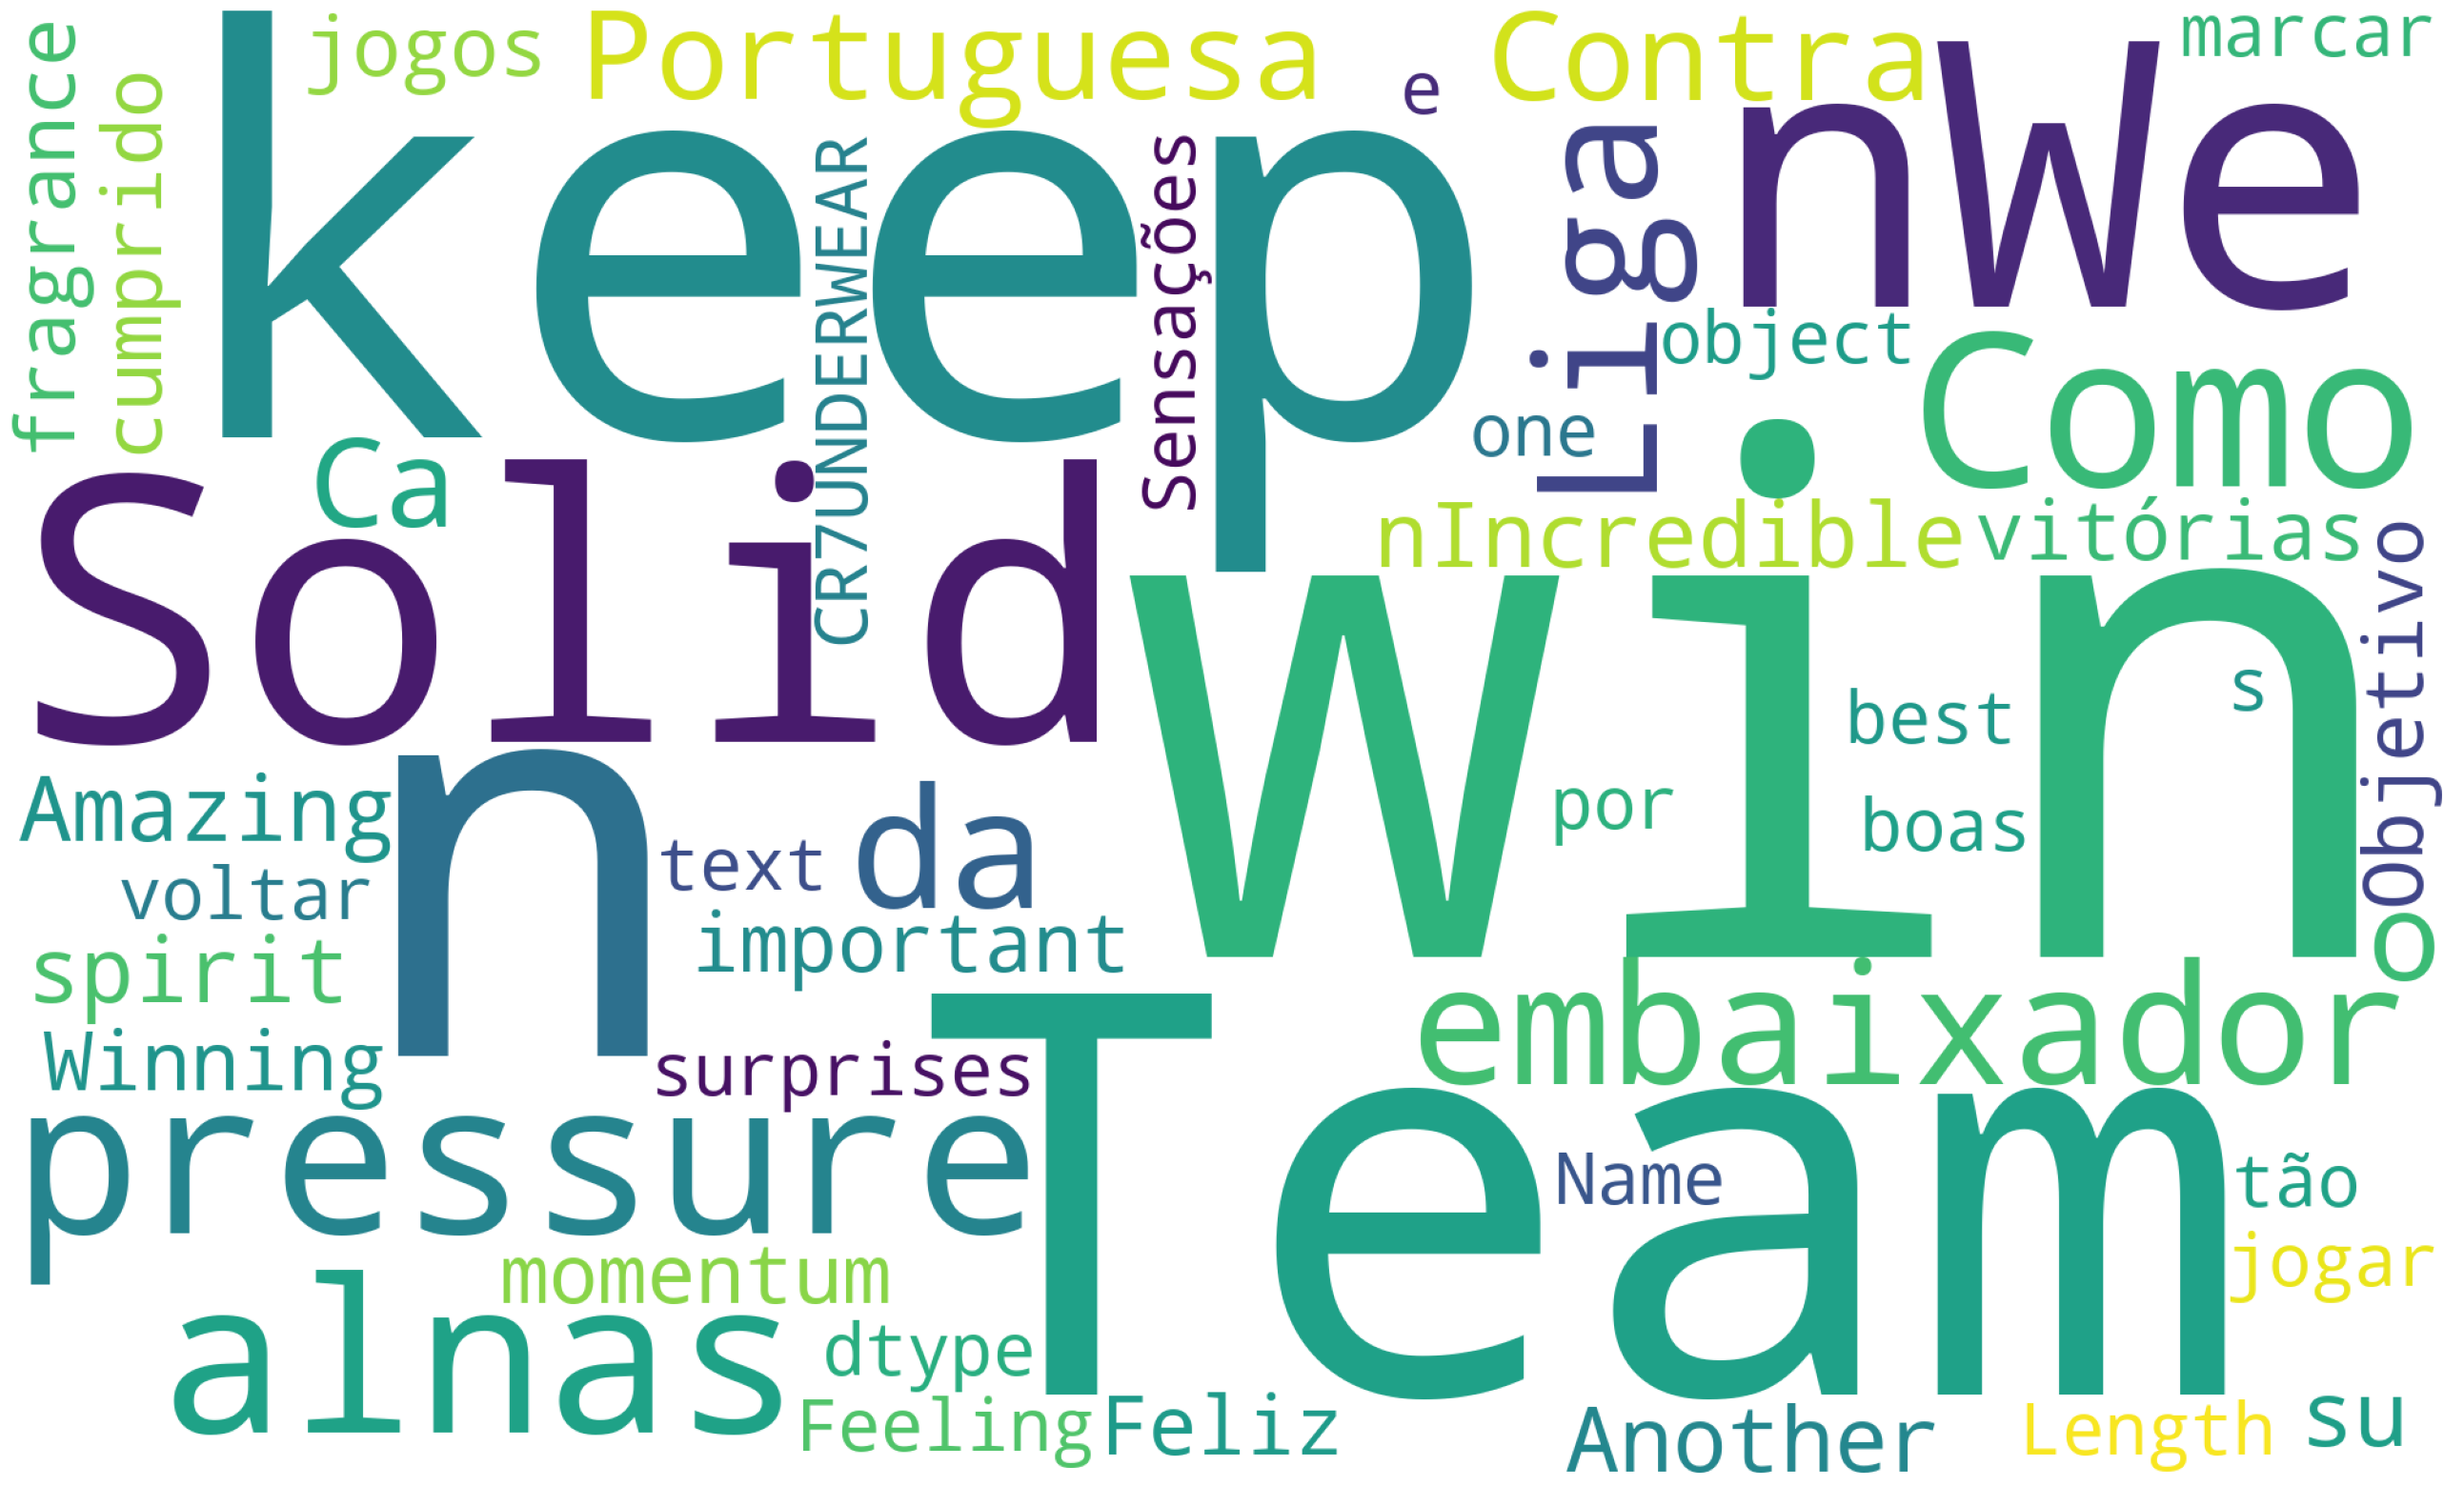

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = str(df['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Sentiment analysis of comments

In [126]:
from transformers import pipeline
from googletrans import Translator, constants
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [127]:
comments = []

for post in df['comments_full']:
    for comment in literal_eval(post):
        # Handle comment
        text = re.sub(r'\W+', ' ', comment['text'])
        if text not in comments:
            comments.append(text)
print(len(comments))

554


In [128]:
sentiment_df = pd.DataFrame(columns=['comment', 'tag', 'confidence'])

In [129]:
def sentiment_analysis(comments):
    translator = Translator()
    en_comments = [translator.translate(text, dest='en').text for text in comments] # Translate every comment to english
    results = sentiment_pipeline(en_comments) # Sentiment analysis
    return results

In [130]:
labels = sentiment_analysis(comments)

In [131]:
for i in range(len(comments)):
    sentiment_df = sentiment_df.append({
        'comment': comments[i],
        'tag': labels[i]['label'],
        'confidence': labels[i]['score']
    }, ignore_index=True)

C:\Users\vtung\AppData\Local\Temp\ipykernel_19192\3122960501.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({
C:\Users\vtung\AppData\Local\Temp\ipykernel_19192\3122960501.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({
C:\Users\vtung\AppData\Local\Temp\ipykernel_19192\3122960501.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({
C:\Users\vtung\AppData\Local\Temp\ipykernel_19192\3122960501.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({
C:\Users\vtung\AppData\Local\Temp\ipykernel_

In [137]:
sentiment_df.head(5)

,comment,tag,confidence
0,Very impressive,POSITIVE,0.999873
1,Best of luck,POSITIVE,0.999697
2,The best player,POSITIVE,0.999823
3,The best of all,POSITIVE,0.999849
4,Congrats,POSITIVE,0.999440


In [132]:
sentiment_df.value_counts('tag')

tag
POSITIVE    501
NEGATIVE     53
dtype: int64

In [136]:
# Save the data
sentiment_df.to_csv('Data/comment_sentiment_Cristiano.csv', index=False)

Text(0, 0.5, 'Count')

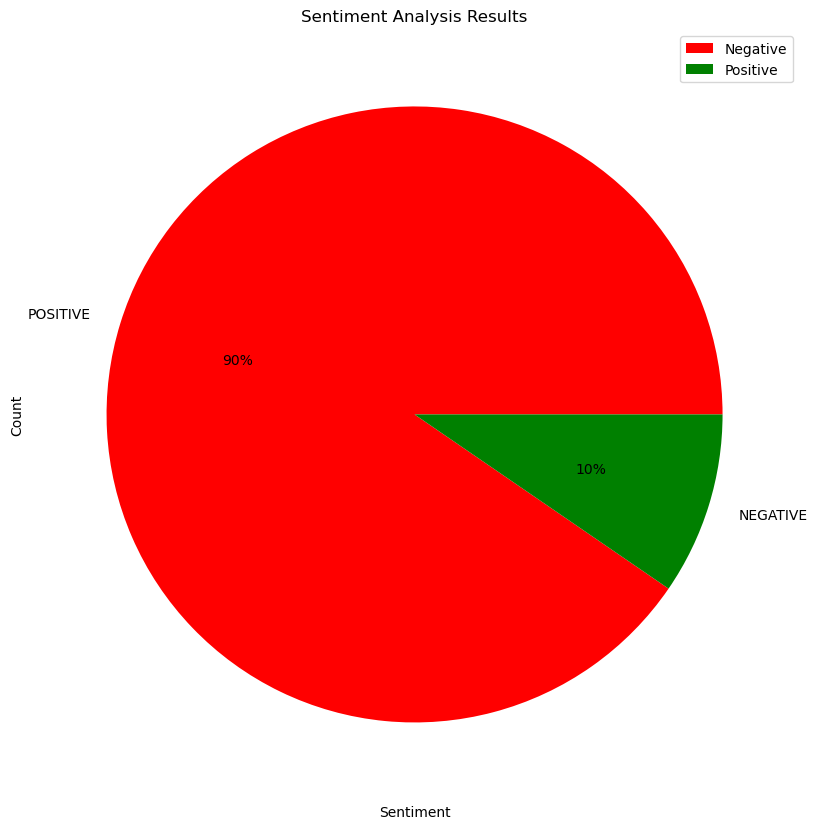

In [ ]:
# Plot a pie chart of the sentiment analysis results
sentiment_df['tag'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'green'], figsize=(10, 10))

# Add a legend to the plot
plt.legend(labels=['Negative', 'Positive'], loc='upper right')

# Add a title and labels to the plot
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')


In [228]:
for neg_cmt in sentiment_df.loc[sentiment_df['tag'] == 'NEGATIVE', ['comment']].values:
    translator = Translator()
    trans_text = translator.translate(neg_cmt, des='en')
    print('Commented in', trans_text.src)
    print(trans_text.text)

Commented in en
['King of football goatnaldo the player of the century no one will come out like you in the football history']
Commented in ar
['God is for the sake of innocent children, helpless women, and helpless men who cannot help them']
Commented in pt
['Let's go Portugal cr7']
Commented in pt
['Let's Portugal CR7']
Commented in en
['Repeat of 2016 ']
Commented in en
['Pain has been successfully delivered to Miami Go higher the one and only GOAT']
Commented in en
['The Goat Cr7 ']
Commented in mi
['Siuuuuuuuu']
Commented in id
['Cr7']
Commented in ar
['Stay there, are you in a movie?']
Commented in ar
['Don's mobile phone was stolen']
Commented in ar
['Who did you give your mobile phone to, Don?']
Commented in ar
['This is based on the fact that it is Al-Ahly, we are joking, Cristiano Ronaldo']
Commented in mi
['SIUUUUUUUUUUUUUUUU']
Commented in en
['They said you were finished Still the GOAT ']
Commented in ar
['But you don't know how to win us, king']
Commented in ar
['Laughter

Predict post reaction

In [ ]:
# Make a copy of current dataframe
df_12Nov = df.copy()[['post_id', 'time', 'comments', 'reaction_count', 'shares']]
df_12Nov['days_since_post'] = df_12Nov['time'].apply(lambda x: (datetime.now() - x).days)

data = df_12Nov.drop(columns=['post_id', 'time'])

In [ ]:
predict = 'reaction_count'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = np.array(data.drop([predict], axis=1))
Y = np.array(data[predict])

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.1)

linear = LinearRegression()

linear.fit(x_train, Y_train)

LinearRegression()

In [ ]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], Y_test[x])

780562.2697119506 [31863  4815   199] 751006
1340700.2303243557 [75902 12663   134] 1774970
399370.0467002946 [10162   780    72] 230112
812326.4963928972 [36575  7509   159] 1090881
603288.0169289862 [28008  4564    14] 738020
828165.4830819137 [38544  8805   147] 1061513
777881.2685175288 [30394  4108   223] 738378
986540.1238958898 [49407 15444   185] 1308846
406958.12609786715 [10507   980    77] 196911
2396710.8637753977 [150575  17900    143] 1985668
280572.7954654745 [4720  514    9] 104043


In [ ]:
score = linear.score(x_test, Y_test)
print(f"Accuracy of the model: {score:.2f}")

Accuracy of the model: 0.81


In [218]:
# Find better model
df_12Nov = df.copy()[['post_id', 'time', 'comments', 'reaction_count', 'shares']]
df_12Nov['days_since_post'] = df_12Nov['time'].apply(lambda x: (datetime.now() - x).days)

data = df_12Nov.drop(columns=['post_id', 'time'])

predict = 'reaction_count'

x = np.array(data.drop([predict], axis=1))
Y = np.array(data[predict])

best = 0
for _ in range(30):
    x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.1)

    linear = LinearRegression()

    linear.fit(x_train, Y_train)
    acc = linear.score(x_test, Y_test)

    if acc > best:
        best = acc
        model = linear

predictions = model.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], Y_test[x])
model.score(x_test, Y_test)

418354.69543968607 [10507   980    78] 196911
526070.8945284018 [22886  4090    20] 543504
652477.7233614825 [22368  4816   161] 743722
777687.5471204622 [42850  9519     9] 927674
830008.3365282116 [34698  5530   180] 808631
1741579.6999012176 [102342  35118    196] 1990465
831070.1295822505 [31133  2099   233] 628536
502733.1824174414 [14141  2023   117] 292920
1297884.7327488237 [77259  9605    90] 1417065
897314.823218085 [45305  7855   104] 866823
773038.4995657414 [32465  6752   149] 716493


0.9029809755962361

User Analysis

In [3]:
list_userID = []
for post in df['comments_full']:
    for comment in literal_eval(post):
        if comment['commenter_id'] not in list_userID:
            list_userID.append(comment['commenter_id'])

In [4]:
list_userID = [id[id.rfind('/') + 1:] for id in list_userID]

In [9]:
commenter = []
for id in list_userID:
    try:
        user = get_profile(id)
        commenter.append(user)
        print(f"Added profile no.{len(commenter)}")
    except:
        continue

Added profile no.1
Added profile no.2
Added profile no.3
Added profile no.4
Added profile no.5
Added profile no.6
Added profile no.7
Added profile no.8
Added profile no.9
Added profile no.10
Added profile no.11
Added profile no.12
Added profile no.13
Added profile no.14
Added profile no.15
Added profile no.16
Added profile no.17
Added profile no.18
Added profile no.19
Added profile no.20
Added profile no.21
Added profile no.22
Added profile no.23
Added profile no.24
Added profile no.25
Added profile no.26
Added profile no.27
Added profile no.28
Added profile no.29
Added profile no.30
Added profile no.31
Added profile no.32
Added profile no.33
Added profile no.34
Added profile no.35
Added profile no.36
Added profile no.37
Added profile no.38
Added profile no.39
Added profile no.40
Added profile no.41
Added profile no.42
Added profile no.43
Added profile no.44
Added profile no.45
Added profile no.46
Added profile no.47
Added profile no.48
Added profile no.49
Added profile no.50
Added pro

In [39]:
commenter_df = pd.DataFrame(commenter)

In [18]:
commenter_df = commenter_df.drop(['Friend_count', 'Follower_count', 'Following_count'], axis=1) # NULL cols

In [33]:
# Loop through all columns
for col in commenter_df.columns:
    # Check if the column name starts with 'Giới thiệu'
    if col.startswith('Giới thiệu'):
        mask = commenter_df[col].notna()
        intro = commenter_df.loc[mask, col].values[0]
        commenter_df.loc[mask, 'Introduction'] = intro
        # Break out of the loop since we only need to do this once
        print('Found ' + col)
        print(intro)
        print()
        commenter_df.drop(col, axis=1, inplace=True)


Found Giới thiệu về Sajib
I am Simple boy.

I like Honest Parson.

He/she Loves their Parents Very Much.

Found Giới thiệu về Rü
☠༒†Mᵉ🄼🅱︎ËRˢ_ᵒ̀F_BLØCK†༒☠

Found Giới thiệu về Davido
Be who you want to be and not what people want to see..

Found Giới thiệu về Harendra Singh
My Page Entertainment, Motivator, Influencer, Youteber

Found Giới thiệu về Abdul
Just feel interest with friends..

Found Giới thiệu về Šhähîñ
I have nothing to say about myself........everything still pending.!

Found Giới thiệu về Banskhali24.com
Vip

Found Giới thiệu về Collo
A boy of character👍😍😎💓Never quits when the going gets tough 💘😟
Learned Council of my life 👊👊😎😎😍😍♥️♥️❤️❤️🔐🔐🔑🔑#@@Mancity die hard fan 😻

Found Giới thiệu về Rëål
A tree is known by its fruit*A man is known by the company he keeps*
check out my frnds be4 u judge me.

Found Giới thiệu về Møhãmmâd
Møhãmmäâd Røkïbûl Ißläm

Found Giới thiệu về Tarikul
WhatsApp

Instagram

Found Giới thiệu về Cadnaan
IAM experiences of lab technician

Found Giới thi

In [138]:
commenter_df.loc[commenter_df['Trích dẫn yêu thích'].notna(), ['Name', 'Trích dẫn yêu thích']].head(5)

,Name,Trích dẫn yêu thích
17,Davido Bonethugs van Wyk,Forgive My Sins. Bless My Soul?
22,Md. Himel Ahammed,"""All children are artists. The problem is how ..."
34,A'sum Lv-k,ไม่ขาดหวังอะไรทียังมาไม่ถึง
46,Abdullah Al Mamun,Al quran
50,Petit Cfa Croate,Même si la vie semble difficile il ya toujours...


In [139]:
commenter_df.loc[commenter_df['Học vấn'].notna(), ['Name', 'Học vấn']].head(5)

,Name,Học vấn
0,Sajib Biwas,SHAHID SYED NAZRUL ISLAM COLLEGE.MYMENSINGH.[S...
3,Mujammel Hosen,"Haji Asmot College,Bhairab\nCao đẳng/Đại học\n..."
10,RA B B I,"Mohongonj Govt.College,Netrokona\nCao đẳng/Đại..."
11,Md. Mirza Roni Beg,National University\nBachelor of Laws (LLB)\nN...
12,𝒮 𝓂 𝓈𝒽𝒶𝒽𝒶𝓁𝒶𝓂 𝓈𝒶𝓇𝓀𝒶𝓇,Brindaban Govt. College Habiganj\nCao đẳng/Đại...


In [60]:
name_comment = {}
for comments in df['comments_full']:
    for comment in literal_eval(comments):
        if comment['commenter_name'] in commenter_df['Name'].values:
            try:
                name_comment[comment['commenter_name']].append(comment['text'])
            except:
                name_comment[comment['commenter_name']] = [comment['text']]
name_comment

{'Sajib Biwas': ['Very impressive!🐐\U0001faf6❤️💟'],
 'कमल पोख्रेल': ['Very impressive!🐐\U0001faf6❤️'],
 'Tala loves you': ['Very impressive!🐐\U0001faf6❤️'],
 'Mujammel Hosen': ['Very impressive!🐐\U0001faf6❤️',
  'Very impressive!🐐\U0001faf6❤️'],
 'Nahida & Nadiya vlog': ['Very impressive!🐐\U0001faf6❤️',
  'Very impressive!🤩❤️'],
 'Siyam Ahmedd': ['Very impressive🐐\U0001faf6❤️'],
 'MD Rony Khan': ['Very impressive!🐐\U0001faf6❤️',
  "You're great CR7👌👌❤️❤️🖤🖤",
  'Very impressive!🐐\U0001faf6❤️',
  'Very impressive!🐐\U0001faf6❤️',
  'Very impressive!🐐\U0001faf6❤️'],
 'Alessio Zagami': ['Very impressive!🐐❤️'],
 'Azad Jashni': ['Very impressive!🐐\U0001faf6❤️'],
 'CR 卝SABBIR চৌধুরীヅ': ['Very impressive!🐐\U0001faf6❤️',
  'Very impressive!🐐\U0001faf6❤️',
  'Congratulations Love ❤️',
  "That's great ❤️",
  'Vamos Portugal 🇵🇹\n#cr7 🤍🤍'],
 'RA B B I': ['Very impressive🐐\U0001faf6❤️', 'Very impressive!🐐\U0001faf6❤️'],
 'Md. Mirza Roni Beg': ['The best player....', 'Love from bangladesh ❤️🇧🇩'],
 '𝒮 

In [61]:
commenter_df['commented_on_page'] = commenter_df['Name'].apply(lambda name: name_comment[name] if name in name_comment.keys() else None)

In [159]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="crawl_page")

def country(place):
    '''
    Get country of location
    '''
    sleep(2)
    # Handle some special case
    if "Huyện" in place:
        return country(place.split('Huyện')[1])
    if ',' in place:
        return country(place.split(', ')[-1])
    
    try:
        location = geolocator.geocode(place, language='en')
        return location.address.split(',')[-1]
    except:
        try:
            translator = Translator()
            location = geolocator.geocode(translator.translate(place, dest='en').text, language='en')
            return country(place)
        except:
            print("Error at", place)
        return 1

print(country("Kathmandu"))

 Nepal


In [171]:
def extract_location(place):
    '''
    Extract location from data string
    '''
    if place:
        location = place.split('\n')
        if len(location) < 3:
            return location[0], None
        else:
            return location[0], location[2]
    return None, None

In [99]:
commenter_df['location'] = commenter_df['Nơi từng sống'].apply(lambda x: extract_location(x)[0] if x else None)
commenter_df['hometown'] = commenter_df['Nơi từng sống'].apply(lambda x: extract_location(x)[1] if x else None)

In [ ]:
# Get country of location
commenter_df['country'] = commenter_df['location'].apply(lambda x: country(x) if x else None)

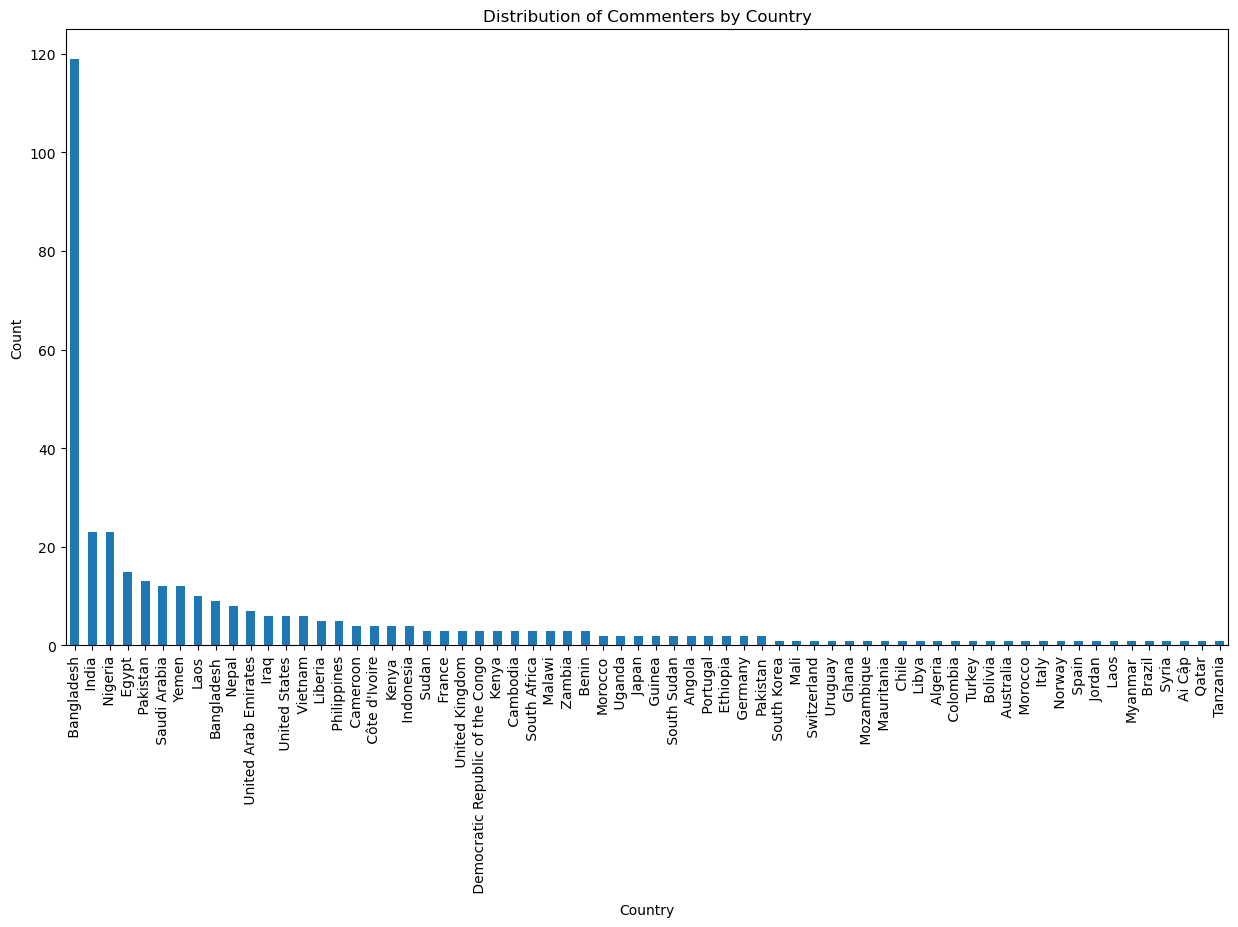

In [183]:
commenter_df['country'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Distribution of Commenters by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


In [188]:
import pycountry_convert as pc

def get_continent(country_name):
    country_name = country_name.strip()
    country_code = pc.country_name_to_country_alpha2(country_name)
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name

commenter_df['region'] = commenter_df['country'].apply(lambda x: get_continent(x) if x else None)

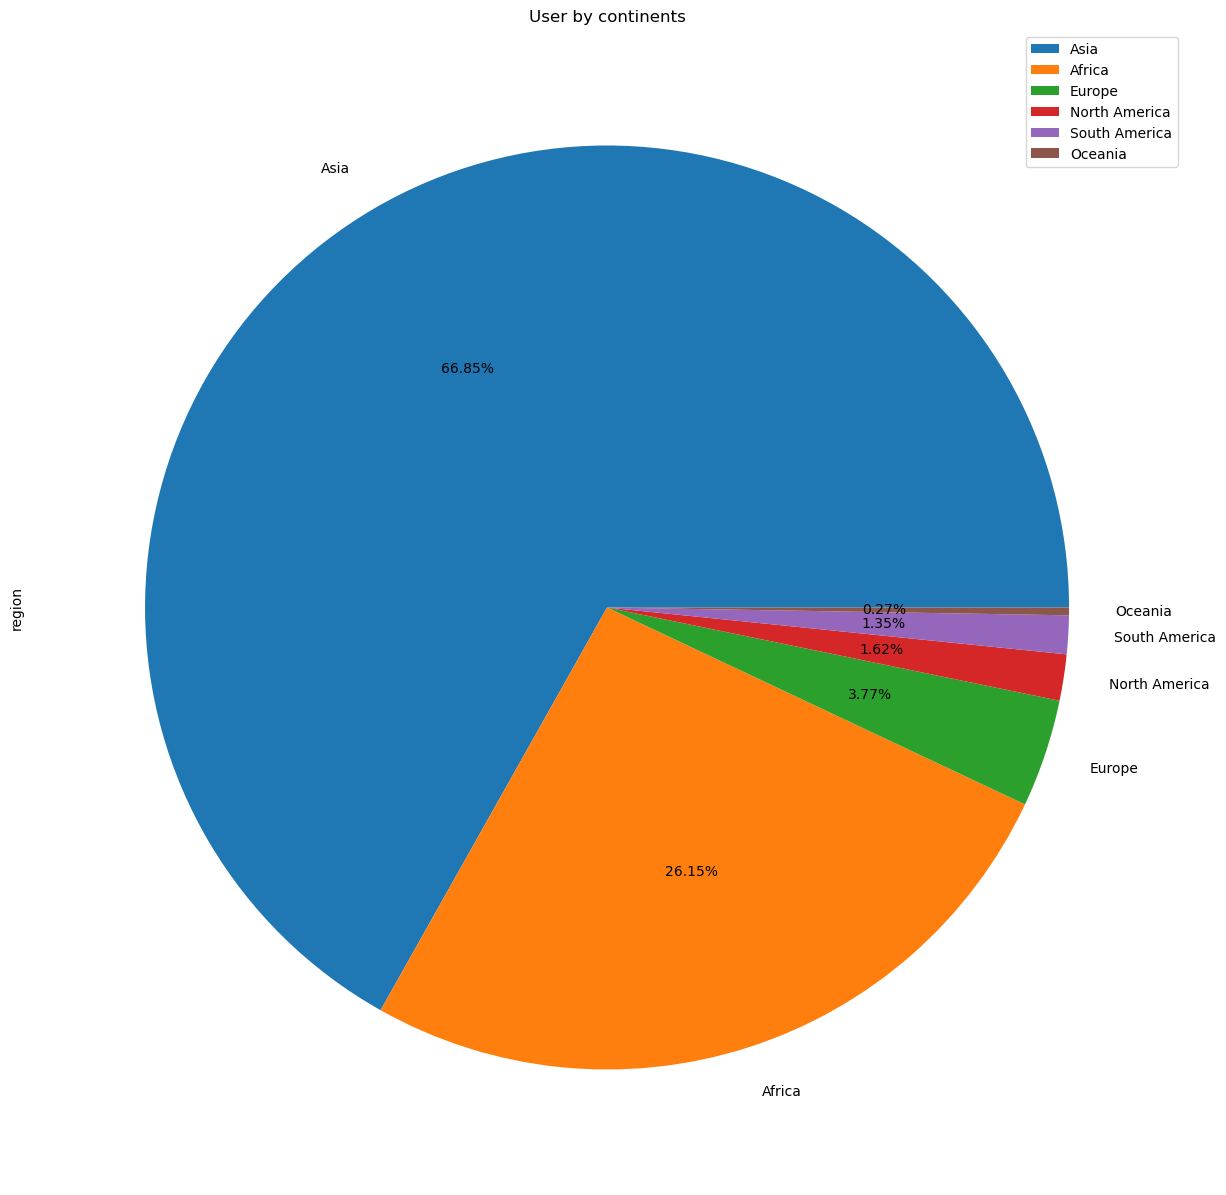

In [200]:
# Pie chart
plt.figure(figsize=(15, 15))
commenter_df['region'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribution of Commenters by Region')
plt.legend(commenter_df['region'].value_counts().index, loc='upper right')
plt.title('User by continents')
plt.show()

Predict reaction_count from day since post

In [202]:
df['day_since_post'] = df['time'].apply(lambda x: (datetime.now() - x).days)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

predict = 'reaction_count'
data = df.copy()[['reaction_count', 'day_since_post', 'hour']]

x = np.array(data.drop([predict], axis=1))
Y = np.array(data[predict])

# Training
best = 0
for _ in range(30):
    x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.1)

    linear = LinearRegression()

    linear.fit(x_train, Y_train)
    acc = linear.score(x_test, Y_test)

    if acc > best:
        best = acc
        model = linear

predictions = model.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], Y_test[x])
model.score(x_test, Y_test)

853926.6660938968 [117  15] 292920
960564.0478083431 [90  0] 1417065
839512.3638488788 [38  4] 647308
841898.5692814615 [122  17] 345603
1087232.9163953338 [190   3] 1072160
654063.2697722913 [40 23] 869102
707254.3451170684 [74 23] 695654
1089823.3066478302 [198   4] 849782
1086206.969535331 [183   2] 1202283
770472.6697592536 [70 16] 155098
1126395.0474126483 [196   0] 1990465


0.294633634498889